<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/MNIST_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
from sklearn.datasets import fetch_openml
import pandas as pd


In [102]:
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [103]:
X, y= mnist.data,mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [104]:
X.shape

(70000, 784)

In [105]:
y.shape

(70000,)

In [106]:
import matplotlib.pyplot as plt


In [107]:
def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

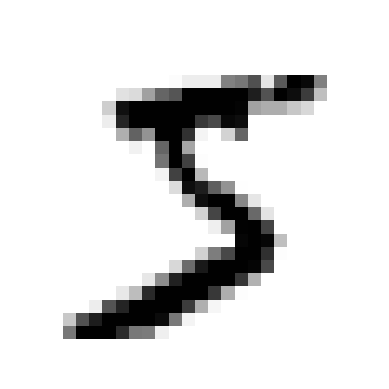

In [108]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [109]:
y[0]

'5'

In [110]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],X[:60000], X[60000:]

#Training a Binary Classifier

In [111]:
y_train_5 = (y_train =='5') # True for all ss, False for all other digits
y_test_5 = (y_test =='5')

# The SGDC is able to handle large dataset efficiently.It deals with training instances independently and suitable for online learning

In [112]:
from sklearn.linear_model import SGDClassifier

In [113]:
sgd_clf = SGDClassifier()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
Training accuracy: 0.9745892857142857
Testing accuracy: 0.9697142857142858

Classification Report (Test Data):
               precision    recall  f1-score   support

       False       0.98      0.99      0.98     12727
        True       0.88      0.78      0.82      1273

    accuracy                           0.97     14000
   macro avg       0.93      0.88      0.90     14000
weighted avg       0.97      0.97      0.97     14000

Confusion Matrix (Test Data):
 [[12588   139]
 [  285   988]]


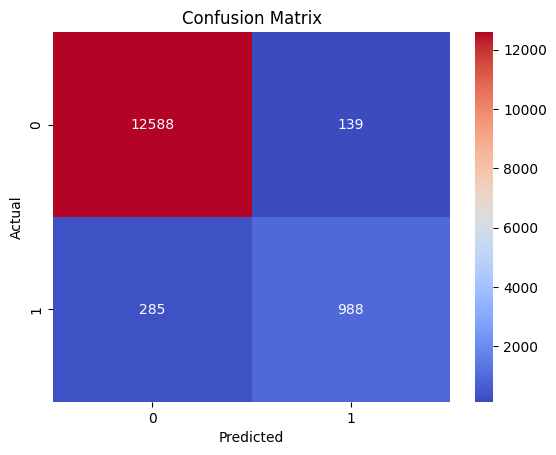

In [114]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Display the structure of the dataset
print(mnist.keys())

# Features and target
X, y = mnist["data"], mnist["target"]

# Convert target to integers
y = y.astype(int)

# Create a binary target variable for detecting the digit '5'
y_binary = (y == 5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Scale the data (important for SGD)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
X_test_scaled = scaler.transform(X_test.astype(float))

# Initialize the SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Train the classifier
sgd_clf.fit(X_train_scaled, y_train)

# Predict using the trained classifier
y_train_pred = sgd_clf.predict(X_train_scaled)
y_test_pred = sgd_clf.predict(X_test_scaled)

# Evaluate the classifier
print("Training accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_pred))

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="coolwarm")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [115]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.9 MB/s eta 0:00:00


In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Features and target
X, y = mnist["data"], mnist["target"]

# Convert target to integers
y = y.astype(int)

# Create a binary target variable for detecting the digit '5'
y_binary = (y == 5)

# Scale the data (important for SGD)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype(float))

# Initialize the SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [118]:
# Evaluate the classifier using cross-validation
cross_val_scores = cross_val_score(sgd_clf, X_scaled, y_binary, cv=5, scoring="accuracy")

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", np.mean(cross_val_scores))

Cross-validation scores: [0.973      0.97078571 0.96592857 0.96692857 0.9725    ]
Mean cross-validation score: 0.9698285714285714


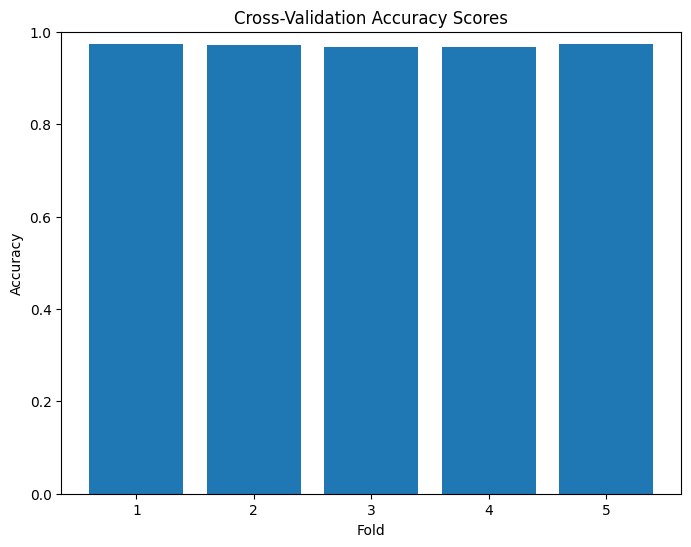

In [119]:
# Visualize the cross-validation scores using a bar plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cross_val_scores) + 1), cross_val_scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Scores')
plt.xticks(range(1, len(cross_val_scores) + 1))
plt.ylim(0, 1)
plt.show()

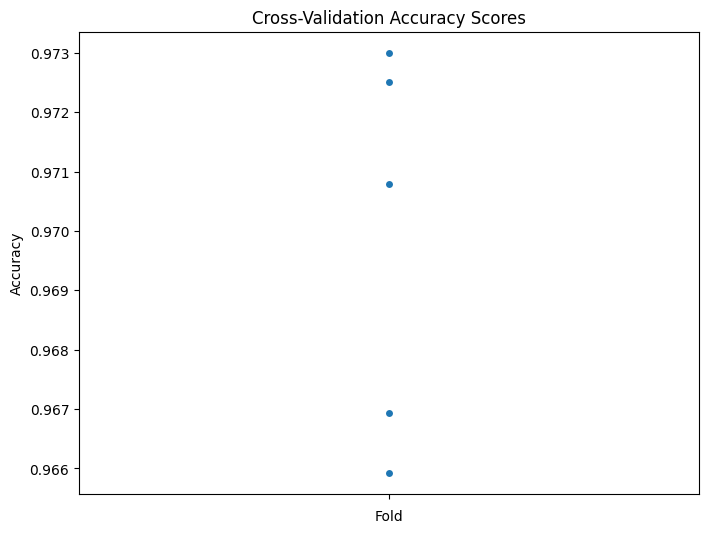

In [120]:
# Visualize the cross-validation scores using a swarm plot
plt.figure(figsize=(8, 6))
sns.swarmplot(data=cross_val_scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Scores')
plt.show()

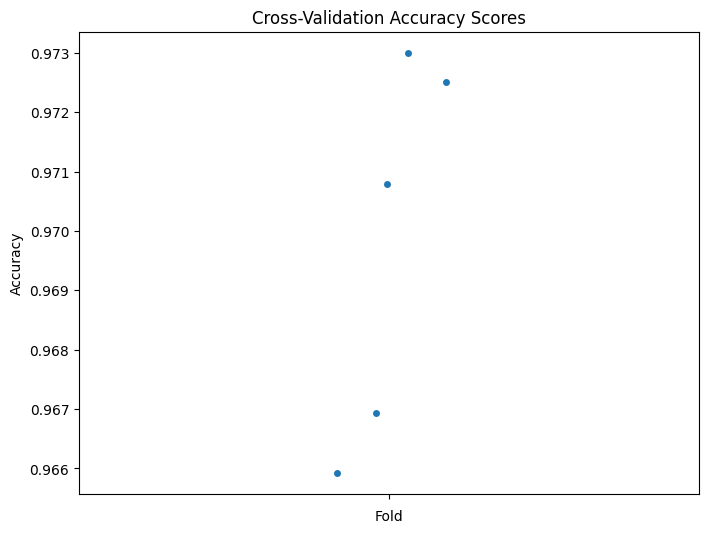

In [121]:
# Visualize the cross-validation scores using a strip plot
plt.figure(figsize=(8, 6))
sns.stripplot(data=cross_val_scores, jitter=True)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Scores')
plt.show()

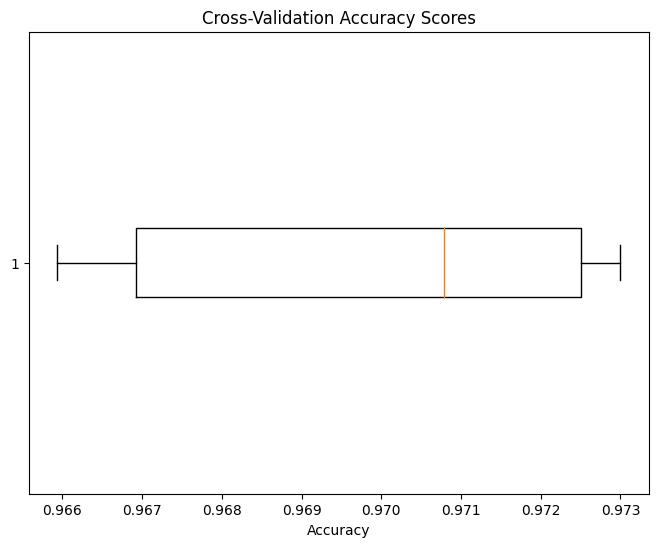

In [122]:
# Visualize the cross-validation scores using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(cross_val_scores, vert=False)
plt.xlabel('Accuracy')
plt.title('Cross-Validation Accuracy Scores')
plt.show()

In [123]:
import seaborn as sns

In [124]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Convert the target to integer type
y = y.astype(np.int8)

# Create a binary target variable for detecting the digit '5'
y_binary = (y == 5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DummyClassifier with the 'most_frequent' strategy
dummy_clf = DummyClassifier(strategy="most_frequent")

# Fit the classifier on the training data
dummy_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dummy_clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'DummyClassifier accuracy (most_frequent): {accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


DummyClassifier accuracy (most_frequent): 0.1143


In [125]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Convert the target to integer type
y = y.astype(np.int8)

# Create a binary target variable for detecting the digit '5'
y_binary = (y == 5)


# Create a DummyClassifier with the 'most_frequent' strategy
dummy_clf = DummyClassifier(strategy="most_frequent")

# Perform 5-fold cross-validation
scores = cross_val_score(dummy_clf, X, y, cv=5, scoring='accuracy')

# Print the cross-validation accuracy scores
print(f'Cross-validation accuracy scores: {scores}')
print(f'Mean cross-validation accuracy: {scores.mean():.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Cross-validation accuracy scores: [0.11257143 0.11257143 0.1125     0.1125     0.1125    ]
Mean cross-validation accuracy: 0.1125


In [126]:
y_train_5 =(y_train =='5')
y_test_5 = (y_test == '5')

In [127]:
dummy_clf =DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train))) # prints False no 5s detected


False


#Performance Measures

#Measuring Accuracy Using Cross Validation

In [128]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([1., 1., 1.])

In [129]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import SGDClassifier

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Convert the target to integer type
y = y.astype(np.int8)

# Create binary target variable for '5'
y_5 = (y == 5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create binary target variables for the training and test sets
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# Instantiate the SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Fit the classifier on the training data
sgd_clf.fit(X_train, y_train_5)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(sgd_clf, X, y_5, cv=5, scoring='accuracy')

# Print the cross-validation accuracy scores
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Cross-validation accuracy scores: [0.96871429 0.96371429 0.94642857 0.9655     0.95757143]
Mean cross-validation accuracy: 0.9604


In [130]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Convert the target to integer type
y = y.astype(np.int8)

# Create a DummyClassifier with the 'most_frequent' strategy
dummy_clf = DummyClassifier(strategy="most_frequent")

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dummy_clf, X, y, cv=5, scoring='accuracy')

# Print the cross-validation accuracy scores
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Cross-validation accuracy scores: [0.11257143 0.11257143 0.1125     0.1125     0.1125    ]
Mean cross-validation accuracy: 0.1125


##This is why accuracy is not the prefered performance measure or classifiers, especially for skewed datasets.The best is to look at the confussion metrics

In [131]:
cross_val_score(dummy_clf, X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91000161, 0.91000161, 0.90999679])

### The StratifiedKFold class performs stratified sampling to produce folds that contains a representative ratio of each class.At each iteration the code creates a clone of classifier, trains that clone on the training folds, and makes predictions on the test fold.Then counts the number of correct predictios and outputs the ratio of correct predictions.

In [132]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [133]:
skfolds =StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train,y_train_5):

    clone_clf = clone(sgd_clf)
X_train_folds = X_train[train_index]
y_train_folds = y_train_5[train_index]
X_test_fold = X_train[test_index]
y_test_fold = y_train_5[test_index]

clone_clf.fit(X_train_folds, y_train_folds)
y_pred = clone_clf.predict(X_test_fold)
n_correct = sum(y_pred == y_test_fold)
print(n_correct / len(y_pred))

0.9624450873245473


#Confusion Matrices

In [134]:
from sklearn.model_selection import cross_val_predict

The confusion matrics is to count the number of times instances of class A are classified as class B for all A/B pairs.For example, to know the number of times the classifier confused images of 8s with 0s, you would look at row 8 columns 0 of the confusion matrix.


Just like the cross_val_score() function, cross_val_predict() performs k-fold cross validation but instead of returning the evaluation scores,it returns the predictions made on each test fold,that means you can get a clean prediction from the training set("by cean "1 mean "Out of shape": the model makes predictions on data that it never saw during training

In [135]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Confusion matrix using the confussion_matrix() function

In [136]:
from sklearn.metrics import confusion_matrix

In [137]:
cm = confusion_matrix(y_train_5, y_train_pred)

In [138]:
cm

array([[50287,   673],
       [ 1180,  3860]])

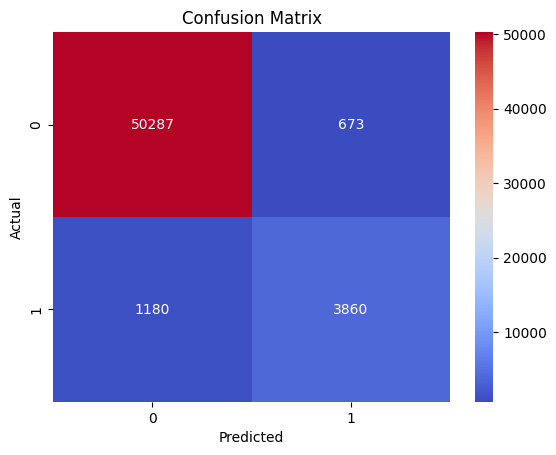

In [139]:
# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_train_5, y_train_pred), annot=True, fmt="d", cmap="coolwarm")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Each row in a confusion matrix represents an actual class, while each column represents an actual class, while each column represents a predicted class.The first row of this matrix considers non-5 images(the negative class):50287 of them were correctly classified as non 5s(they are called true negatives), while the remaining 673 were wrongly classified as 5s(false positives, also called type 1 errors).
The second row considers the images of 5s(the posistive class):1180 were wrongly classified as non-5s(false negatives, also called type 11 errors),
while the remaining 3860 were correctly classified as 5s(true positives).
A perfect classifier would only have true positives and true negatives, so confussion matrix would have nonzero vlaues only on its main diagonal(top left to bottom right):

In [140]:
y_train_perfect_predictions = y_train_5 # pretend we reach perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[50960,     0],
       [    0,  5040]])

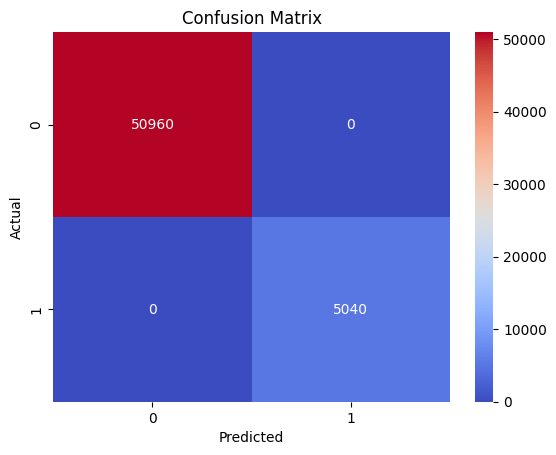

In [141]:
# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_train_5, y_train_perfect_predictions), annot=True, fmt="d", cmap="coolwarm")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Precision and Recall

In [142]:
from sklearn.metrics import precision_score, recall_score

In [143]:
precision_score(y_train_5, y_train_pred) # ==3860/(673 +3860)

0.8515332009706597

In [144]:
recall_score(y_train_5,y_train_pred)  # 3860/1180

0.7658730158730159

#F1 Score

It is convenient to combine precision and recall into a single metrics called F1 score, especially when you need a single metrics to compare two classifiers.
The F1 score is the harmonic mean of precision and recall.The classifier will get a high F1 score if both recall and precision are high

In [145]:
from sklearn.metrics import f1_score

In [146]:
f1_score(y_train_5,y_train_pred)

0.8064347644416588

# The precision/ Recall Trade-off

##Precision-Recall Curve: This plot helps visualize the trade-off between precision and recall at different thresholds. By observing the curve, you can select a threshold that balances precision and recall according to your needs.
##Threshold Adjustment: The choice of threshold affects the balance between precision and recall. Lowering the threshold increases recall but decreases precision, and vice versa.
##This approach provides a comprehensive view of how the classifier performs
##and helps in making informed decisions about which metric (precision, recall, or a balance of both) is more important for the given task.

In [147]:
# Instantiate the SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Fit the classifier on the training data
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [148]:
# Assuming 'some_digit' is an index of a sample in the test set
some_digit = X_test[0]  # Using the first sample in the test set as an example

# Predict the decision function score for the sample
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)

[[-62905.93787222 -62000.75692651  -8408.59470974 -10239.10459104
  -42128.79401569  -2187.92138348 -67173.00258241 -32668.07738877
    4480.97802564 -11376.7412203 ]]


In [149]:
# Perform 5-fold cross-validation to get precision and recall
cv_precision = cross_val_score(sgd_clf, X, y_5, cv=5, scoring='precision')
cv_recall = cross_val_score(sgd_clf, X, y_5, cv=5, scoring='recall')

print(f'Cross-validated precision: {cv_precision.mean():.4f}')
print(f'Cross-validated recall: {cv_recall.mean():.4f}')

Cross-validated precision: 0.7881
Cross-validated recall: 0.7988


##The SGDClassifier uses a threshold equal to 0, so the preceding code returns the same results as the predict() method(ie, True), Let's raise the threshold:

In [150]:
threshold = 0

In [151]:
y_some_digit_pred = (y_scores > threshold)

In [152]:
threshold = 3000
y_some_digit_pred = (y_scores >  threshold)
y_some_digit_pred

array([[False, False, False, False, False, False, False, False,  True,
        False]])

## How do you decide the threshold to use?
First, use the cross_val_predict() function to get the scores of all instances in the training set but this time specify that you want to return decision scores instead of predictions:

In [153]:
y_scores = cross_val_predict(sgd_clf, X_train,y_train_5, cv=3,
                             method="decision_function")

In [154]:
from sklearn.metrics import precision_recall_curve

In [155]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

In [170]:
import matplotlib.pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (2908,) and (56000,)

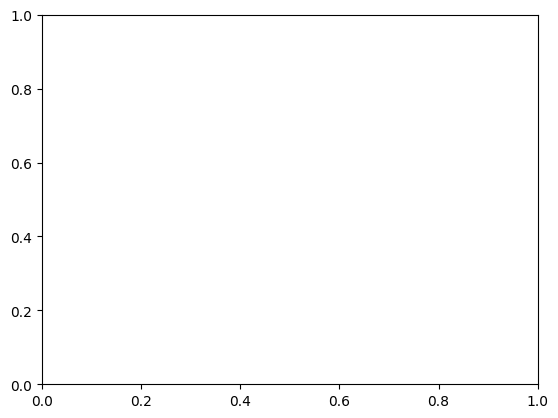

In [171]:
# Plot precision and recall versus the decision threshold
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0.1,0,"k", "dotted", label="threshold")
[...] #beautify the figure: add grid,legend,axis,labels, and circles
plt.show()


## The precision / recall trade off: images are ranked by their classifier score and those above chosen decision decision threshold are considered positive , the higher the threshold, the lower the recall but ingeneral the higher the precision

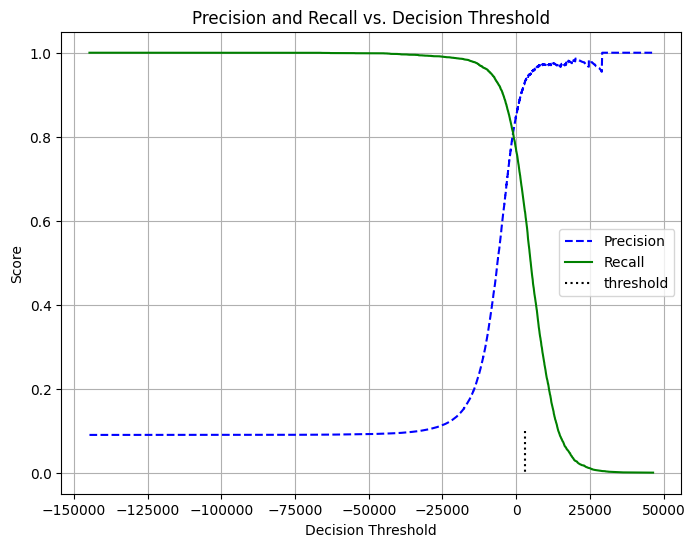

In [158]:


# Plot precision and recall versus the decision threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.vlines(threshold, 0.1,0,"k", "dotted", label="threshold")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Decision Threshold")
plt.legend(loc="best")
plt.grid(True)
plt.show()

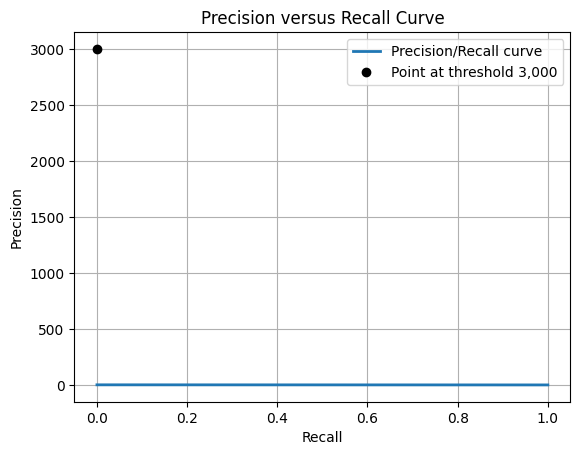

In [167]:
# Plot the precision-recall curve
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.plot(threshold, "ko", label="Point at threshold 3,000")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision versus Recall Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [160]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

1583.5206905024331

## Instead of calling the classifier predict() method for prediction you can run the code below

In [161]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

##Lets check the precision call

In [162]:
precision_score(y_train_5,y_train_pred_90)

0.9

##If someone says lets reach a 99% ask at what recall

In [163]:


# Calculate recall at 90% precision
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)

print(f"Recall at 90% precision: {recall_at_90_precision:.4f}")

Recall at 90% precision: 0.6946


#ROC - receiver operating characteristic

#It is another common tool used with binary classifiers.It is very similiar to the precision/recall curve but instead of ploting precision verse recall, the ROC curve plots the true posistive rate(another name for recall) against the false positive rate(FPR).tHE FPR (also called the fall-out) is the ratio of negative instances that are incorrectly classified as positive.It is equal  to 1- the true negative rate(TNR), which is the ratio of negative instances that are correctly classified as negative.The TNR is also called specificity.Hence, the ROC curvr plots sensitivity(recall) versus 1 - specificity

In [164]:
from sklearn.metrics import roc_curve

In [165]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [172]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

In [182]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, recall_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Convert the target to integer type
y = y.astype(np.int8)

# Create binary target variable for '5'
y_5 = (y == 5)

# Randomly sample 3,000 data points
np.random.seed(42)
indices = np.random.choice(len(X), 3000, replace=False)
X_sample = X[indices]
y_sample = y_5[indices]

# Split the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Instantiate the SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Fit the classifier on the training data
sgd_clf.fit(X_train, y_train)

# Predict the decision scores for the test set
y_scores = sgd_clf.decision_function(X_test)

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Compute ROC curve and ROC area
fpr, tpr, roc_thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Find the threshold for 90% precision
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

# Predict using the threshold for 90% precision
y_train_pred_90 = (y_scores >= threshold_90_precision)

# Calculate recall at 90% precision
recall_at_90_precision = recall_score(y_test, y_train_pred_90)

# Find the false positive rate and true positive rate for the threshold
fpr_90 = fpr[np.argmax(precisions >= 0.90)]
tpr_90 = tpr[np.argmax(precisions >= 0.90)]

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# Additional plot details
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.grid(True)

# Show plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


IndexError: index 586 is out of bounds for axis 0 with size 54

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Recall at 90% precision: 0.2453


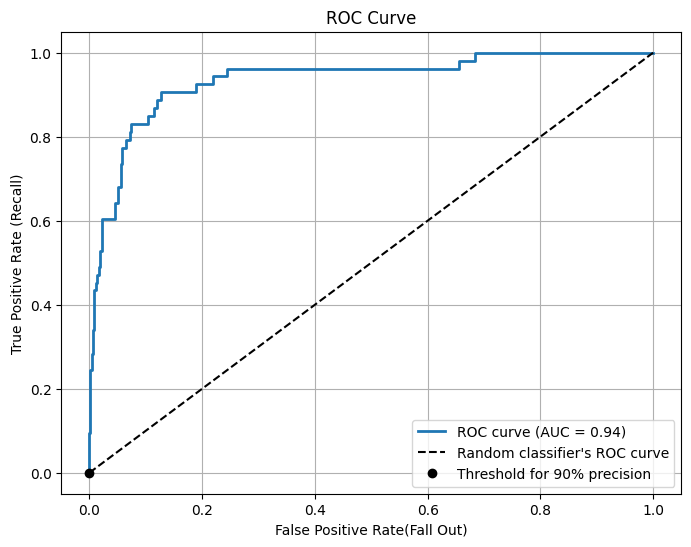

In [184]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, recall_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Convert the target to integer type
y = y.astype(np.int8)

# Create binary target variable for '5'
y_5 = (y == 5)

# Randomly sample 3,000 data points
np.random.seed(42)
indices = np.random.choice(len(X), 3000, replace=False)
X_sample = X[indices]
y_sample = y_5[indices]

# Split the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Instantiate the SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Fit the classifier on the training data
sgd_clf.fit(X_train, y_train)

# Predict the decision scores for the test set
y_scores = sgd_clf.decision_function(X_test)

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Compute ROC curve and ROC area
fpr, tpr, roc_thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Find the threshold for 90% precision
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

# Predict using the threshold for 90% precision
y_pred_90_precision = (y_scores >= threshold_90_precision)

# Calculate recall at 90% precision
recall_at_90_precision = recall_score(y_test, y_pred_90_precision)

print(f"Recall at 90% precision: {recall_at_90_precision:.4f}")

# Find the corresponding FPR and TPR for the 90% precision threshold
fpr_90 = fpr[np.argmax(roc_thresholds >= threshold_90_precision)]
tpr_90 = tpr[np.argmax(roc_thresholds >= threshold_90_precision)]

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# Additional plot details
plt.xlabel('False Positive Rate(Fall Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.grid(True)

# Show plot
plt.show()
